<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#线性回归" data-toc-modified-id="线性回归-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>线性回归</a></span><ul class="toc-item"><li><span><a href="#一元线性回归的实现" data-toc-modified-id="一元线性回归的实现-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>一元线性回归的实现</a></span><ul class="toc-item"><li><span><a href="#最小二乘法" data-toc-modified-id="最小二乘法-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>最小二乘法</a></span></li><li><span><a href="#最小二乘法程序实现" data-toc-modified-id="最小二乘法程序实现-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>最小二乘法程序实现</a></span></li><li><span><a href="#梯度下降法" data-toc-modified-id="梯度下降法-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>梯度下降法</a></span></li><li><span><a href="#梯度下降法程序实现" data-toc-modified-id="梯度下降法程序实现-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>梯度下降法程序实现</a></span></li></ul></li></ul></li><li><span><a href="#神经网络" data-toc-modified-id="神经网络-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>神经网络</a></span><ul class="toc-item"><li><span><a href="#多元线性回归" data-toc-modified-id="多元线性回归-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>多元线性回归</a></span><ul class="toc-item"><li><span><a href="#多元线性回归--二分类" data-toc-modified-id="多元线性回归--二分类-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>多元线性回归--二分类</a></span></li><li><span><a href="#多分类" data-toc-modified-id="多分类-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>多分类</a></span></li></ul></li></ul></li></ul></div>

## 线性回归

线性回归包括一元线性回归和多元线性回归，一元的是只有一个x和一个y。多元的是指有多个x和一个y。

### 一元线性回归的实现

$y=kx+b$

In [51]:
import numpy as np
import matplotlib.pyplot as plt

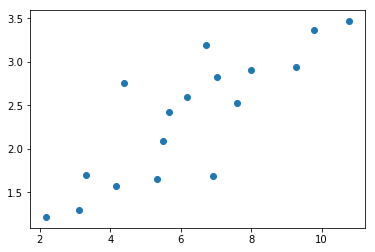

In [52]:
%matplotlib inline
X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
plt.scatter(X,Y)


一元线性回归其实就是去找一条直线，这条直线能以最小的误差（Loss）来拟合数据。原有的数据点肯定不可能都在这条直线上，只能使所有的数据点尽量的接近这条直线。那去找每个点和直线的距离$ \left|(y_i-y)\right|$ 最小的那条线，为了简单起见，将绝对值转化为平方，那么误差可以表示偏差平方和$ Loss=\sum_{i=1}^{n}{(y_i-y)^2} $。里i表示第i个数据，N表示总的样本个数。一般我们还会把Loss求和平均，来当作最终的损失 $ Loss=\frac{1}{n}\sum_{i=1}^{n}{(y_i-y)^2}=\frac{1}{n}\sum_{i=1}^{n}{(y_i-(kx_i+b))^2} $




我们要怎么去找到最能拟合数据的直线？即最小化误差呢？
有两种方法：

#### 最小二乘法

从损失函数可见，其中的x,y,i,N都是已知的，那么我们就可以把这个方程看作是k和b的方程。作为一个k和b的二次方程。那么求Loss最小值的问题就转变成了求极值问题。通过偏导可以求出k和b，公式如下：

 $ k=\frac{\sum_{i=1}^{n} {(x_i-\overline{x})(y_i-\overline{y})}}{\sum_{i=1}^{n} {(x_i-\overline{x})^2}}=\frac{\sum_{i=1}^{n}{x_iy_i}-n\overline{x}\overline{y}}{\sum_{i=1}^{n}{x_i^2}-n{\overline{x}}^2}$

 $ b=\overline{y} -k*\overline{x} $

#### 最小二乘法程序实现

0.251634944284
k=0.25163494428355404
b=0.7988012261753894
可得函数：y=0.252*x+0.799


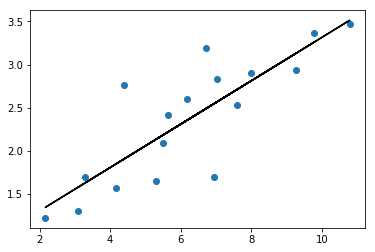

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#定义x和y

X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
#求得xi减x平均
x1=X-X.mean()
#求得yi减去y平均
y1=Y-Y.mean()
#求得K值
# k1=((X*Y).sum()-len(X)*X.mean()*Y.mean())/((X*X).sum()-len(X)*X.mean()*X.mean())
print k1
k=(x1*y1).sum()/(x1*x1).sum()
print 'k='+`k`
#用K值求得b
b=Y.mean()-k*X.mean()
print 'b='+`b`
print '可得函数：y=%0.3f*x+%0.3f'%(k,b)
y_predict = k*X+b
#画点
pylab.plot(X,Y,'o')
#画出所求得的线
pylab.plot(X,y_predict,'k-')

#### 梯度下降法

没有梯度下降就没有现在的深度学习，最小二乘法在维度较小的情况下，是比较好的方法，能够直接求出k和b，但在维度大的情况下，最小二乘法的计算量就太大了，所以要利用梯度下降法。梯度下降法和最小二乘法不一样，它通过一步一步的迭代，慢慢的去靠近到那条最优直线。
梯度下降的公式：
$loss_k=-\frac{2}{n}\sum_{i=1}^{n}{x_i*(y_i-(k*x_i+b))}$

$loss_b=-\frac{2}{n}\sum_{i=1}^{n}{(y_i-(k*x_i+b))}$

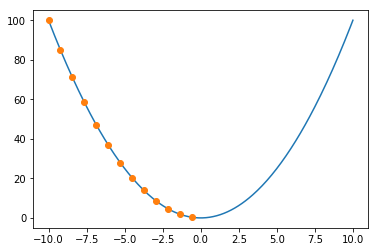

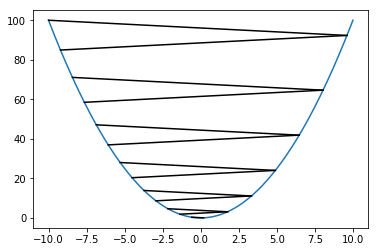

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-10, 10, 256,endpoint=True)
Y = X*X
plt.plot(X,Y)
plt.plot(X[:128:10],Y[:128:10],'o')
plt.show()
plt.plot(X,Y)
x1=X[::10]
y1=Y[::10]
for i in range(len(x1)/2):
    if i%2==0:
        x_=[x1[i],x1[len(x1)-i-1]]
        y_=[y1[i],y1[len(x1)-i-1]]
    else:
        x_=[x1[len(x1)-i],x1[i]]
        y_=[y1[len(x1)-i],y1[i]]
    plt.plot(x_,y_,'k-')
plt.show()

从两图可以看出，梯度下降选择步长要合适。如果选择过小，则梯度下降缓慢，计算量大大增加，如果过大，会出现振荡情况，可能导致不收敛

#### 梯度下降法程序实现

initial variables:
 initial_b = 0.0
 intial_m = 0.0
 error of begin = 6.10003223529 

iter 0:error=5.99434731328
iter 100:error=1.16296182659
iter 200:error=0.375666097209
iter 300:error=0.247140146381
iter 400:error=0.225926892334
iter 500:error=0.22219585127
iter 600:error=0.221313937347
iter 700:error=0.220897464341
iter 800:error=0.220558131469
iter 900:error=0.220232679455
iter 1000:error=0.219910797211
iter 1100:error=0.219590798756
iter 1200:error=0.219272403144
iter 1300:error=0.218955558331
iter 1400:error=0.218640249593
iter 1500:error=0.218326468315
iter 1600:error=0.218014206907
iter 1700:error=0.217703457975
iter 1800:error=0.21739421419
iter 1900:error=0.21708646826
final formula parmaters:
 b = 0.085854548064
 k=0.352197977699
 error of end = 0.216783268129 



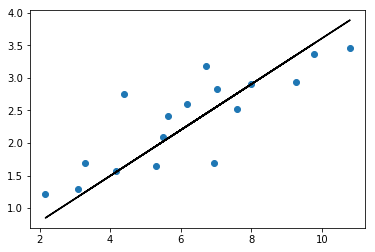

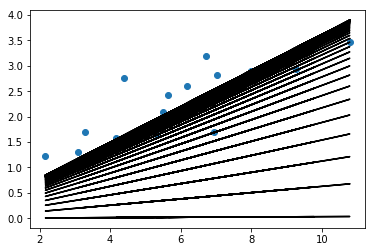

In [5]:
%matplotlib inline
import numpy as np
import pylab
import matplotlib.pyplot as plt
b_m_l=[]
def compute_error(b,m,data):

    totalError = 0
    x = data[:,0]
    y = data[:,1]
    totalError = (y-m*x-b)**2
    totalError = np.sum(totalError,axis=0)

    return totalError/float(len(data))

def optimizer(data,starting_b,starting_m,learning_rate,num_iter):
    b = starting_b
    m = starting_m
    for i in range(num_iter):
        b,m =compute_gradient(b,m,data,learning_rate)
        if i%100==0:
#             plot_data(data,b,m)
            print 'iter {0}:error={1}'.format(i,compute_error(b,m,data))
        if i%20==0:
            b_m_l.append([b,m])
    return [b,m]
def compute_gradient(b_current,m_current,data ,learning_rate):

    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    x = data[:,0]
    y = data[:,1]
    b_gradient = -(2/N)*(y-m_current*x-b_current)
    b_gradient = np.sum(b_gradient,axis=0)
    m_gradient = -(2/N)*x*(y-m_current*x-b_current)
    m_gradient = np.sum(m_gradient,axis=0)
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b,new_m]


def plot_data(data,b,m):

    #plottting
    x = data[:,0]
    y = data[:,1]
    y_predict = m*x+b
    pylab.plot(x,y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
def plot_data_gc(data,b_m_l):
    x = data[:,0]
    y = data[:,1]
   
    pylab.plot(x,y,'o')
    for i in b_m_l:
        y_predict=i[1]*x+i[0]
        pylab.plot(x,y_predict,'k-')
    pylab.show()
def Linear_regression():
    data=np.asarray(zip([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1],[1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]))
    learning_rate = 0.0001
    initial_b =0.0
    initial_m = 0.0
    num_iter = 2000
    print 'initial variables:\n initial_b = {0}\n intial_m = {1}\n error of begin = {2} \n'\
        .format(initial_b,initial_m,compute_error(initial_b,initial_m,data))
    [b ,m] = optimizer(data,initial_b,initial_m,learning_rate,num_iter)

    print 'final formula parmaters:\n b = {1}\n k={2}\n error of end = {3} \n'.format(num_iter,b,m,compute_error(b,m,data))
    plot_data(data,b,m)
    plot_data_gc(data,b_m_l)
if __name__ =='__main__':

    Linear_regression()

## 神经网络

### 多元线性回归

#### 多元线性回归--二分类


二维时可以表示成y=kx+b，多维也可以表示为$ Y=\omega X+B $

$ \omega=\lbrack\omega_0,\omega_1,\omega_2......\omega_n\rbrack^T $,X也是相同形状的因子阵，其中一个因子就是一个维度。
接下来考虑如何把线性拟合发展成非线性的。
首先用一个ln函数，如公式：$ln(y)=\omega*x+b$
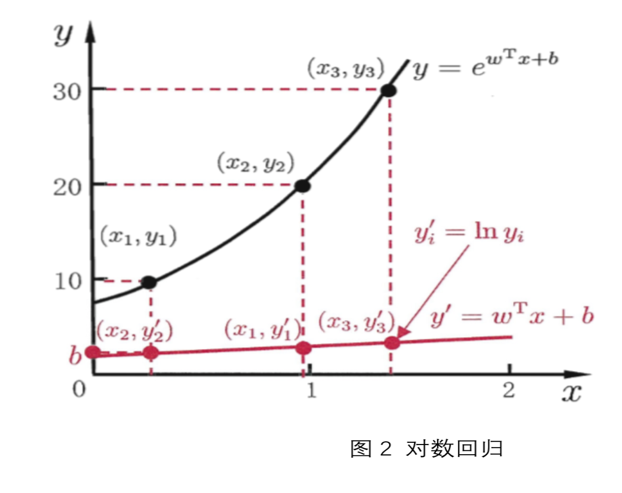

接下来把对数回归发展成对数几率回归：
回归是拟合，那如何进行分类和判断趋势？
二分类的基本方法是：在定义域上把数据分成两类，其中红线是阶跃函数，小于0与大于0，分别对应1
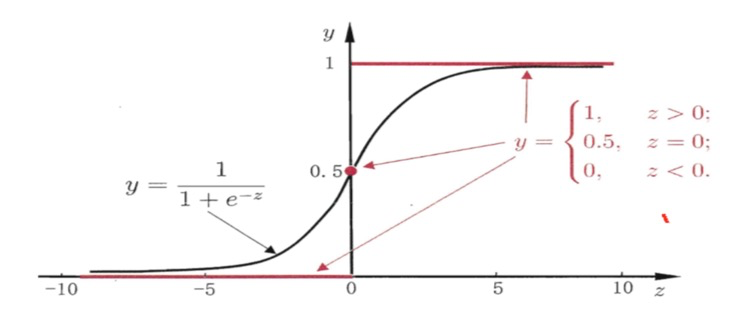

可以看到，阶跃函数可以进行分类，但是不可微，因为函数不连续，那就不能应用梯度下降，因为梯度下降是求偏导数。所以选用logistic函数或sigmoid函数。（sigmoid命名由来应为这个函数的图像看着像s）
sigmoid函数：$y=\frac{1}{1+e^{-z}}$
可微函数：$ y=g^{-1}\omega*x+b$
综合可以得到：$y=\frac{1}{1+e^{\omega*x+b}} $

化简可得：$ ln\frac{1}{1-y}=\omega*x+b$

从y和1-y可以看到什么？y+1-y=1，恰好可以表达概率的正面可能和反面可能，因为函数有ln，所以称为对数几率回归，这个回归就可以用于分类了，最主要的是右面还是$\omega*x+b$

#### 多分类

如对A、B、C、D分类，那如何用那个对数几率回归分类，可以先考虑A类，然后把其他几类归为一类，算出A类的几率，依次算出B、C、D的几率，然后几率最大的就归为那类，这就叫soft max。可以看到softmax算法的要点相对于对于逻辑回归还是没有变化，还是求$\omega$和b。
由于softmax的结构是输入、通过系数阵$\omega$和偏置b映射到各种输出分类上，所以softmax就是单层神经网络。

那如何求$\omega$和b呢？
由于给出训练集x和y，x和y一一对应，用$y_s-y$可以反映出理想与真实的差，显然这个差可以表达为$\omega$和b的函数，这个称为损失函数。那如何求得$\omega$和b呢，那就让损失最小即可。
那如何让损失最小呢，可以采用最小二乘法和梯度下降法。